“Анализ данных о сердечно-сосудистых заболеваниях
(поиск инсайтов, составление рекомендаций стейкхолдерам,
построение модели классификации наличия заболевания)”


In [1]:
# Импорт нужных библиотек
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from scipy import stats
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score,accuracy_score
from sklearn.metrics import confusion_matrix


In [2]:
# Загрузка данных
df = pd.read_csv('cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.info()
# информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


В информации о данных :
1. 70000 строк с данными
2. Нет пустых значений и пропусков
3. Все данные кроме "weight" - вес,  имеют тип данных int- целое число. "weight" - тип данных float - данные с плавающей точкой, дробные.
4. 13 столбцов
5. Размер 6,9 МБ

Описание полей датасета:
1. id -Идентификатор
2. age -Возраст
3. gender -Пол (1-женщины, 2-мужчины)
4. height- Рост
5. weight- Вес
6. ap_hi- Систолическое давление
7. p_lo- Диастолическое давление
8. cholesterol- Уровень холестерина (1-в норме, 2- выше нормы,3-значительно выше нормы)
9. gluc- Уровень глюкозы (1-в норме, 2- выше нормы,3-значительно выше нормы)
10. smoke- Курение
11. alco -Употребление алкоголя
12. active- Физическая активность
13. cardio- Наличие или отсутствие сердечно-сосудистого заболевания (целевая переменная)





In [4]:
# Т.к. столбец "age" это возраст в днях, приведем данные к количеству полных лет.
# Преобразование столбца "age" из дней в годы (количество лет)
# Не учитываем високосный год, т.к. в данном датасете это не имеет смысла, нам нужно количество полных лет, а не дата рождения.
df['age'] = df['age']//365
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


**Анализируем выбросы**

In [5]:
#Статистические данные
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Из данных статистики:
1. Столбец "age" имеет нормальные значения
2. Столбцы  "height","weight", "ap_hi","ap_lo"- Имеют аномальные значения минимум и максимум .



Text(0.5, 1.0, 'Distribution of ap_hi')

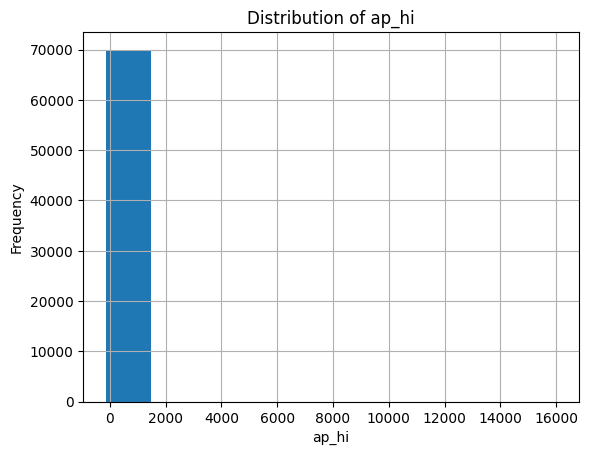

In [6]:
# Распределение данных в столбце "ap_hi"
# Проверим данные на нормальность распределения, чтобы выбрать способ проверки на выбросы
df['ap_hi'].hist()

plt.xlabel('ap_hi')
plt.ylabel('Frequency')
plt.title('Distribution of ap_hi')

Данные имеют близкое к нормальному распределению, проверим выбросы с помоощью межквартильного размаха.

In [7]:
# межквартильный размах. Выбросы
Q1= df['ap_hi'].quantile(0.25)
Q3 = df['ap_hi'].quantile(0.75)
IQR = Q3 - Q1
low_= Q1 -(1.5 * IQR)
hi_ = Q3 + (1.5 *IQR)
print(f"нижняя граница систалического давления", low_)
print(f"верхняя граница систалического давления",hi_)

нижняя граница систалического давления 90.0
верхняя граница систалического давления 170.0


Text(0.5, 1.0, 'Distribution of ap_lo')

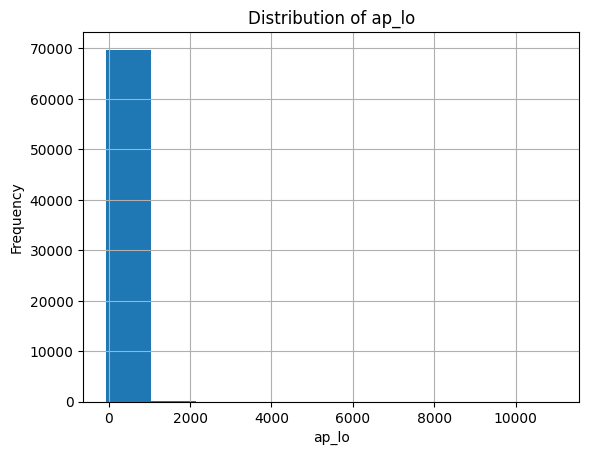

In [8]:
# Распределение данных в столбце "ap_lo"
# Проверим данные на нормальность распределения, чтобы выбрать способ проверки на выбросы
df['ap_lo'].hist()

plt.xlabel('ap_lo')
plt.ylabel('Frequency')
plt.title('Distribution of ap_lo')

Данные имеют близкое к нормальному распределению, проверим выбросы с помоощью межквартильного размаха.


In [9]:
# межквартильный размах. Выбросы
Q1= df['ap_lo'].quantile(0.25)
Q3 = df['ap_lo'].quantile(0.75)
IQR = Q3 - Q1
low_= Q1 -(1.5 * IQR)
hi_ = Q3 + (1.5 *IQR)
print(f"нижняя граница диастолического давления", low_)
print(f"верхняя граница диастолического давления",hi_)

нижняя граница диастолического давления 65.0
верхняя граница диастолического давления 105.0


Text(0.5, 1.0, 'Distribution of height')

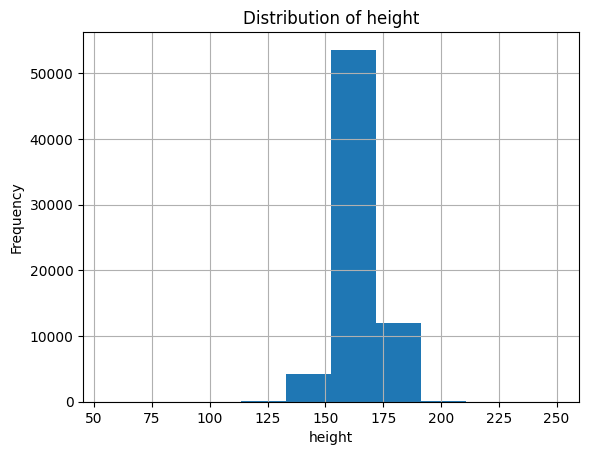

In [10]:
# Распределение данных в столбце "height"
# Проверим данные на нормальность распределения, чтобы выбрать способ проверки на выбросы
df['height'].hist()

plt.xlabel('height')
plt.ylabel('Frequency')
plt.title('Distribution of height')

Данные имеют близкое к нормальному распределению, проверим выбросы с помоощью межквартильного размаха.

In [11]:
# межквартильный размах. Выбросы
Q1= df['height'].quantile(0.25)
Q3 = df['height'].quantile(0.75)
IQR = Q3 - Q1
low_= Q1 -(1.5 * IQR)
hi_ = Q3 + (1.5 *IQR)
print(f"нижняя граница роста", low_)
print(f"верхняя граница роста",hi_)

нижняя граница роста 142.5
верхняя граница роста 186.5


Text(0.5, 1.0, 'Distribution of weight')

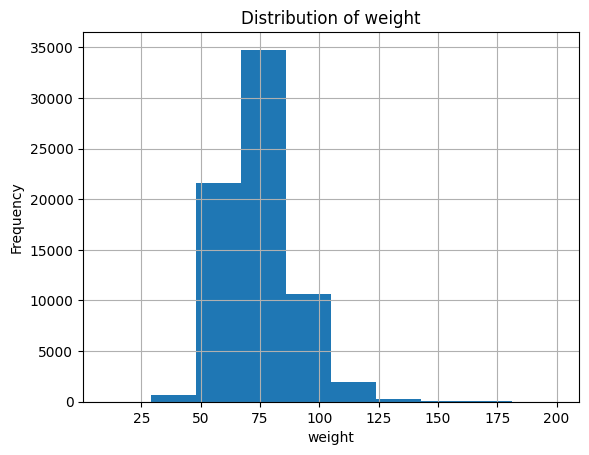

In [12]:
# Распределение данных в столбце "weight"
# Проверим данные на нормальность распределения, чтобы выбрать способ проверки на выбросы
df['weight'].hist()

plt.xlabel('weight')
plt.ylabel('Frequency')
plt.title('Distribution of weight')

Данные имеют близкое к нормальному распределению, проверим выбросы с помоощью межквартильного размаха.

In [13]:
# межквартильный размах. Выбросы
Q1= df['weight'].quantile(0.25)
Q3 = df['weight'].quantile(0.75)
IQR = Q3 - Q1
low_= Q1 -(1.5 * IQR)
hi_ = Q3 + (1.5 *IQR)
print(f"нижняя граница веса", low_)
print(f"верхняя граница веса",hi_)

нижняя граница веса 39.5
верхняя граница веса 107.5


При проверке на выбросы с помощью межквартильного размаха теряются возможные цифры АД (как систолического, так и диастолического) при заболеваниях ССС. В выбросы попадают значения систолического давления >170 и < 90 и диастолического >105 и < 65.
В практике может быть  систолическое давление в диапазоне от 80 до 250 мм.рт.ст
и диастолическое от 60 до 165.
Если мы удалим эти значения как выброс, можем потерять реальные данные.

Проверим данные в столбцах с давлением согласно практическим данным, для решения удаления или замены на среднее или медиану.

In [14]:
#Количество и значения в столбце "систалическое  давление" >250
display(df[(df['ap_hi']>250)]['ap_hi'].count())
#display(df[(df['ap_hi']>250)]['ap_hi'])

40

В столбце систолическое давление > 250 мм.рт.ст. 40 значений (это 0,05% от общих данных) аномально высоких, таких как 900 и т.п. Скорее всего это ошибка ввода данных.

In [15]:
#Количество и значения в столбце "систалическое  давление" <90
display(df[(df['ap_hi']<90)]['ap_hi'].count())
#display(df[(df['ap_hi']<90)]['ap_hi'])

321

В столбце систолическое давление  < 90 мм.рт.ст. 321 значений (это 0,45% от общих данных) аномально низких , таких как 14 и т.п. Скорее всего это ошибка ввода данных

In [16]:
#Количество и значения в столбце "диастолическое давление" >165
display(df[(df['ap_lo']>165)]['ap_lo'].count())
#display(df[(df['ap_lo']>165)]['ap_lo'])

966

В столбце диастолическое  давление  >  165 мм.рт.ст. 966 значений (это 1,38% от общих данных) аномально высоких , таких как 800 и т.п. Скорее всего это ошибка ввода данных

In [17]:
# Количество и значения в столбце "диастолическое давление" <60
display(df[(df['ap_lo']<60)]['ap_lo'].count())
#display(df[(df['ap_lo']<60)]['ap_lo'])

175

В столбце диастолическое  давление  < 60  мм.рт.ст. 175 значений (это 0,25 % от общих данных) аномально низких , таких как 50 и т.п. Скорее всего это ошибка ввода данных

По данным межквартильного размаха выбросы по столбцу "рост" выше 186 и ниже 142.
Если удалять или заменять эти данные, могут быть потеряны реальные данные роста, что повлияет
на подсчет ИМТ в дальнейшем исследовании. Оставим реально возможный рост 200 см и посмотрим
сколько значений превышает эту цифру.
И так же минимальный рост 142 - это очень низкий рост.
Проверим сколько данных меньше 150 см (минимальный средний рост в мире)

In [18]:
# Количество и значения в столбце "рост" >200
display(df[(df['height']>200)]['height'].count())
#display(df[(df['height']>200)]['height'])


2

В столбце "рост" >200 два аномально высоких значения

In [19]:
# Количество и значения в столбце "рост" <150
display(df[(df['height']<150)]['height'].count())
#display(df[(df['height']<150)]['height'])


1537

< 150 см 1537 значений (2,19% от общего значения)

Значения в столбце вес согласно межквартильному размаху, так же приведут к потере данных по верхней границе 107 кг.
Возьмем максимальный вес 180 кг,что вполне реально и минимальный 40 кг.
Посмотрим сколько значений выбивается из этих параметров.

In [20]:
# Количество и значения в столбце "вес" >180
display(df[(df['weight']>180)]['weight'].count())
#display(df[(df['weight']>180)][['weight','height']])


4

In [21]:
# Количество и значения в столбце "вес" <40
display(df[(df['weight']<40)]['weight'].count())
#display(df[(df['weight']<40)][['weight','height']])

52

**Очистка данных**






Согласно вышеизложенным вычислениям, меньше 2% данных имеют аномальные значения, которые можно заменить на моду или среднее. Проверим значения моды и среднего.
Также в столбцах систолическое давление и диастолическое давление были отрицательные значения,которые при положительном знаке входят в зону не аномальных. Заменим их  на положительные.

In [22]:
# Заменяем отрицательные значения в стобцах на положительные (по модулю)
df[['ap_hi','ap_lo']]= df[['ap_hi','ap_lo']].abs()


In [23]:
# Посчитаем моду и среднее для столбца "ap_hi"
print(f"Мода", df['ap_hi'].mode()[0])
print ('----------------')
print(f"Среднее", df['ap_hi'].mean().round())



Мода 120
----------------
Среднее 129.0


In [24]:
# Посчитаем моду и среднее для столбца "ap_lo"
print(f"Мода", df['ap_lo'].mode()[0])
print ('----------------')
print(f"Среднее", df['ap_lo'].mean().round())

Мода 80
----------------
Среднее 97.0


In [25]:
# Посчитаем моду и среднее для столбца "height"
print(f"Мода", df['height'].mode()[0])
print ('----------------')
print(f"Среднее", df['height'].mean().round())

Мода 165
----------------
Среднее 164.0


In [26]:
# Посчитаем моду и среднее для столбца "weight"
print(f"Мода", df['weight'].mode()[0])
print ('----------------')
print(f"Среднее", df['weight'].mean().round())

Мода 65.0
----------------
Среднее 74.0


Заменим значения выбросов везде на моду.

In [27]:
# Заменим значения систалического давления >250 и <90  на моду 120
df.loc[df['ap_hi'] >250, 'ap_hi'] = 120
df.loc[df['ap_hi'] <90, 'ap_hi'] = 120

#Заменим значения диастолического давления >160 и <60 на моду 80
df.loc[df['ap_lo'] >160, 'ap_lo'] = 80
df.loc[df['ap_lo'] <60, 'ap_lo'] = 80

#Заменим значения в стобце Вес <40  на моду 65
df.loc[df['weight'] <60, 'weight'] = 65

#Заменим значения в стобце Рост >200 и <150  на моду 165
df.loc[df['height'] >200, 'height'] = 165
df.loc[df['height'] <150, 'height'] = 165
# Смотрим очищенные данные
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,65.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [28]:
# Смотрим стаистику на очищенном датасете
df.describe()
# Все значения укладываются в рамки реальных значений.

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.828014,75.453332,127.057229,81.394614,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.766774,0.476838,7.374771,12.924981,16.946556,9.449946,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.000000,1.000000,150.000000,60.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,200.000000,200.000000,240.000000,160.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# Проверяем информацию о новых данных
df.info()
# Пропущенных значений и пустых строк нет, тип данных не поменялся.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


**Анализ данных**

Посмотрим как влияет возраст на наличие или отсутствие СС заболевания. Разделим данные на два датасета с заболеванием и без и отфильтруем по значению возраст.

In [30]:
# Фильтрация по столбцу 'cardio' и 'age'
#Cardio_1 - есть заболевание ССС
print('Есть заболевание ССС')
cardio_1 = df[df['cardio'] ==1]
print(cardio_1.groupby(['age'])['cardio'].count())
print('----------------------')
# Cardio_0 нет заболевания ССС
print('Нет заболевания ССС')
cardio_0 = df[df['cardio'] ==0]
print(cardio_0.groupby(['age'])['cardio'].count())


Есть заболевание ССС
age
39     432
40     348
41     564
42     424
43     744
44     544
45     851
46     639
47    1059
48     826
49    1449
50    1248
51    1593
52    1521
53    1950
54    1750
55    2172
56    1931
57    2092
58    1899
59    2199
60    1868
61    1857
62    1475
63    1993
64    1551
Name: cardio, dtype: int64
----------------------
Нет заболевания ССС
age
29       3
30       1
39    1348
40    1274
41    1339
42     994
43    1287
44     970
45    1236
46     986
47    1138
48     985
49    1968
50    1968
51    1775
52    1758
53    1918
54    1855
55    1755
56    1676
57    1594
58    1510
59    1377
60    1332
61     871
62     724
63     743
64     636
Name: cardio, dtype: int64


Построим график зависимости роста количества заболевших от возраста.

Text(0.5, 1.0, 'Распределение по возрасту')

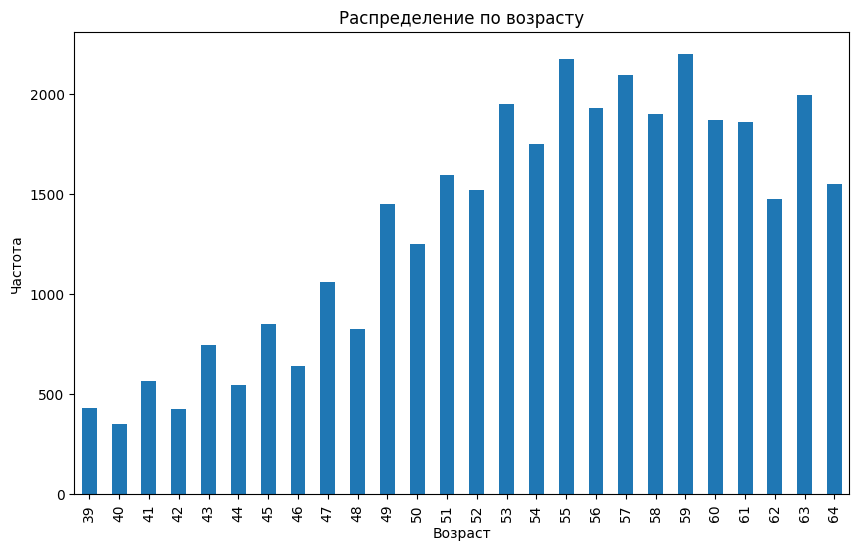

In [31]:
# На графике смотрим в каком возрасте больше ССС заболеваний и растет ли заболеваемость с возрастом
cardio_1.groupby(['age'])['cardio'].count().plot.bar(figsize=(10,6))
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Распределение по возрасту')

На графике видно, что с возрастом увеличивается число пациентов, имеющих заболевание ССС.

Посмотрим, какое АД чаще встречается у пациентов имеющих СС заболевание и не имеющие данную патологию..

In [32]:
# Смотрим какое  давление чаще встречается у людей с заболеванием ССС
df_ap_1=cardio_1.groupby(['ap_hi','ap_lo'])['cardio'].count().sort_values(ascending=False).reset_index()
df_ap_1['share_total %']=df_ap_1['cardio']/70000*100
df_ap_1.round(2).head(5)


,ap_hi,ap_lo,cardio,share_total %
0,120,80,8503,12.15
1,140,90,4714,6.73
2,130,80,2630,3.76
3,130,90,2095,2.99
4,140,80,2020,2.89


In [33]:
# Смотрим какое  давление чаще встречается у людей не имеющих заболеваний ССС
df_ap_0=cardio_0.groupby(['ap_hi','ap_lo'])['cardio'].count().sort_values(ascending=False).reset_index()
df_ap_0['share_total %']=df_ap_0['cardio']/70000*100
df_ap_0.round(2).head(5)


,ap_hi,ap_lo,cardio,share_total %
0,120,80,15245,21.78
1,110,70,4151,5.93
2,130,80,1932,2.76
3,110,80,1690,2.41
4,120,70,1510,2.16


Нормальное среднее давление 120/80 чаще всего встречается у пациентов не имеющих СС заболеваний. Почти на 10%.

Посмотрим насколько чаще имеют и не имеют заболевание ССС женщины и мужчины

In [34]:
# Распределение по полу
print('С заболеваниями ССС, 1- женщины; 2- мужчины')
print(cardio_1.groupby(['gender'])['cardio'].count())
print('------------------')
print('Без заболеваний ССС, 1- женщины; 2- мужчины')
print(cardio_0.groupby(['gender'])['cardio'].count())

С заболеваниями ССС, 1- женщины; 2- мужчины
gender
1    22616
2    12363
Name: cardio, dtype: int64
------------------
Без заболеваний ССС, 1- женщины; 2- мужчины
gender
1    22914
2    12107
Name: cardio, dtype: int64


Данные распределились почти одинаково. Перевеса по гендерному распределению нет.

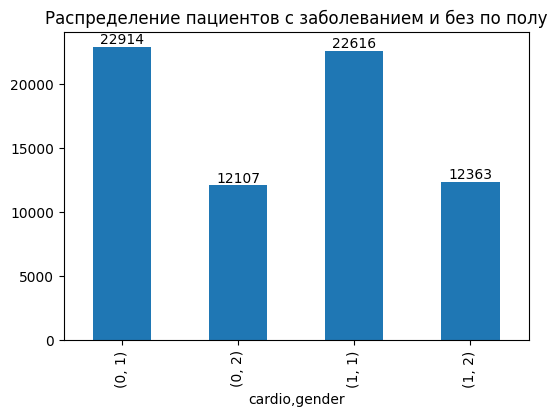

In [35]:
# Визуализируем распределение по полу.
plt.figure(figsize=[6,4])
ax=df.groupby(['cardio','gender'])['gender'].count().plot(kind="bar")
ax.bar_label(ax.containers[0])
plt.title("Распределение пациентов с заболеванием и без по полу")
plt.show()

Посмотрим как распределены данные по имеющим заболевание ССС и не имеющим в зависимости от  уровня холестерина.

In [36]:
# Распределение по уровню холестерина
print('С заболеваниями ССС, 1-в норме; 2- выше нормы;3- значительно выше нормы')
print(cardio_1.groupby(['cholesterol'])['cardio'].count())
print('------------------')
print('Без заболеваний ССС, 1-в норме; 2- выше нормы;3- значительно выше нормы')
print(cardio_0.groupby(['cholesterol'])['cardio'].count())

С заболеваниями ССС, 1-в норме; 2- выше нормы;3- значительно выше нормы
cholesterol
1    23055
2     5750
3     6174
Name: cardio, dtype: int64
------------------
Без заболеваний ССС, 1-в норме; 2- выше нормы;3- значительно выше нормы
cholesterol
1    29330
2     3799
3     1892
Name: cardio, dtype: int64


По данным видно, что:
1. При нормальном уровне холестерина число пациентов без заболеваний ССС выше на 27%
2. При повышении холестерина риск заболевания ССС возрастает.
3. При уровне выше нормы на 51%
4. При уровне значительно выше нормы на 226%

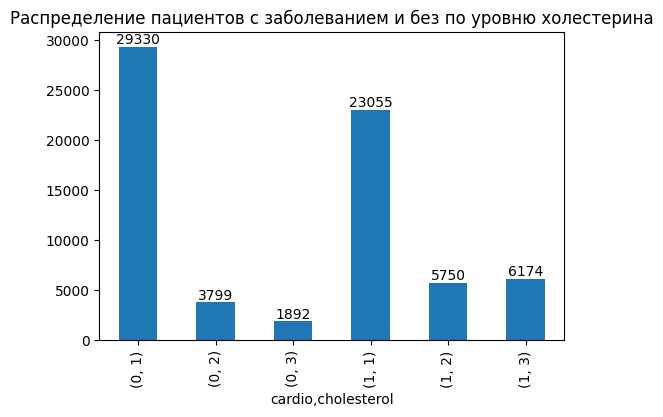

In [37]:
# Визуализируем
plt.figure(figsize=[6,4])
ax=df.groupby(['cardio','cholesterol'])['cholesterol'].count().plot(kind="bar")
ax.bar_label(ax.containers[0])
plt.title("Распределение пациентов с заболеванием и без по уровню холестерина")
plt.show()

Посмотрим как распределены данные по имеющим заболевание ССС и не имеющим в зависимости от  уровня глюкозы.

In [38]:
# Распределение по уровню глюкозы
print('С заболеваниями ССС, 1-в норме; 2- выше нормы;3- значительно выше нормы')
print(cardio_1.groupby(['gluc'])['cardio'].count())
print('------------------')
print('Без заболеваний ССС, 1-в норме; 2- выше нормы;3- значительно выше нормы')
print(cardio_0.groupby(['gluc'])['cardio'].count())

С заболеваниями ССС, 1-в норме; 2- выше нормы;3- значительно выше нормы
gluc
1    28585
2     3078
3     3316
Name: cardio, dtype: int64
------------------
Без заболеваний ССС, 1-в норме; 2- выше нормы;3- значительно выше нормы
gluc
1    30894
2     2112
3     2015
Name: cardio, dtype: int64


По данным видно, что:

1. При нормальном уровне глюкозы число пациентов без заболеваний ССС выше на 8%
2. При повышении глюкозы риск заболевания ССС возрастает.
3. При уровне выше нормы на 45%
4. При уровне значительно выше нормы на 64%

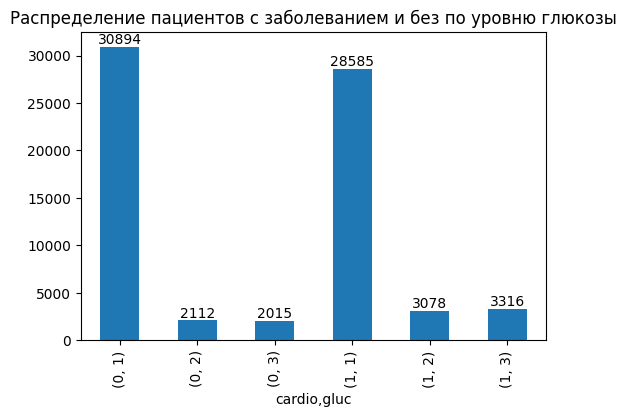

In [39]:
# визуализируем
plt.figure(figsize=[6,4])
ax=df.groupby(['cardio','gluc'])['gluc'].count().plot(kind="bar")
ax.bar_label(ax.containers[0])
plt.title("Распределение пациентов с заболеванием и без по уровню глюкозы")
plt.show()


Посмотрим как распределены данные по имеющим заболевание ССС и не имеющим в зависимости от  такого фактора как курение.




In [40]:
# Распределение по курящим и не курящим
print('С заболеваниями ССС')
print(cardio_1.groupby(['smoke'])['cardio'].count())
print('------------------')
print('Без заболеваний ССС')
print(cardio_0.groupby(['smoke'])['cardio'].count())

С заболеваниями ССС
smoke
0    32050
1     2929
Name: cardio, dtype: int64
------------------
Без заболеваний ССС
smoke
0    31781
1     3240
Name: cardio, dtype: int64


По данным видно, что:

Курение практически не оказывает влияние в данной группе пациентов на наличие СС заболеваний

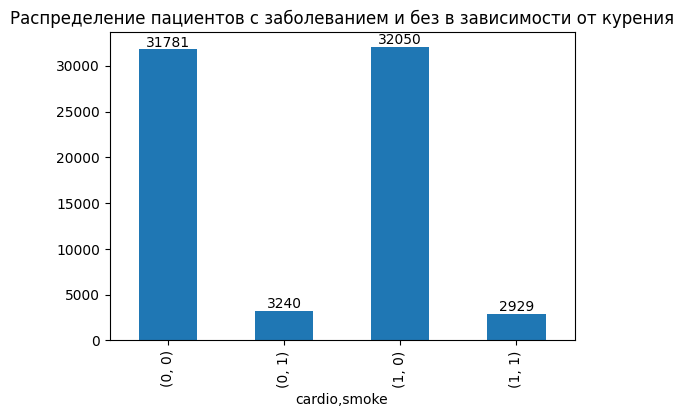

In [41]:
# визуализируем
plt.figure(figsize=[6,4])
ax=df.groupby(['cardio','smoke'])['smoke'].count().plot(kind="bar")
ax.bar_label(ax.containers[0])
plt.title("Распределение пациентов с заболеванием и без в зависимости от курения")
plt.show()

Посмотрим как распределены данные по имеющим заболевание ССС и не имеющим в зависимости от  такого фактора как алкоголь.

In [42]:
# Распределение по употреблению алкоголя
print('С заболеваниями ССС')
print(cardio_1.groupby(['alco'])['cardio'].count())
print('------------------')
print('Без заболеваний ССС')
print(cardio_0.groupby(['alco'])['cardio'].count())

С заболеваниями ССС
alco
0    33156
1     1823
Name: cardio, dtype: int64
------------------
Без заболеваний ССС
alco
0    33080
1     1941
Name: cardio, dtype: int64


По данным видно, что:

Употребление алкоголя в данной группе пациентов не имеет влияния на наличие заболевания ССС.


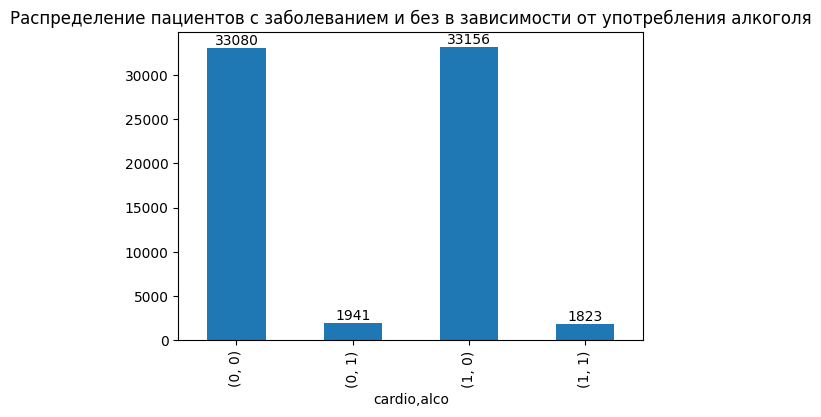

In [43]:
# визуализируем
plt.figure(figsize=[6,4])
ax=df.groupby(['cardio','alco'])['alco'].count().plot(kind="bar")
ax.bar_label(ax.containers[0])
plt.title("Распределение пациентов с заболеванием и без в зависимости от употребления алкоголя")
plt.show()

Посмотрим как распределены данные по имеющим заболевание ССС и не имеющим в зависимости от  такого фактора как физическая активность.

In [44]:
# Распределение по уровню физической активности
print('С заболеваниями ССС')
print(cardio_1.groupby(['active'])['cardio'].count())
print('------------------')
print('Без заболеваний ССС')
print(cardio_0.groupby(['active'])['cardio'].count())

С заболеваниями ССС
active
0     7361
1    27618
Name: cardio, dtype: int64
------------------
Без заболеваний ССС
active
0     6378
1    28643
Name: cardio, dtype: int64


По данным видно, что:

1. Пациенты без физической активности   болеют чаще.


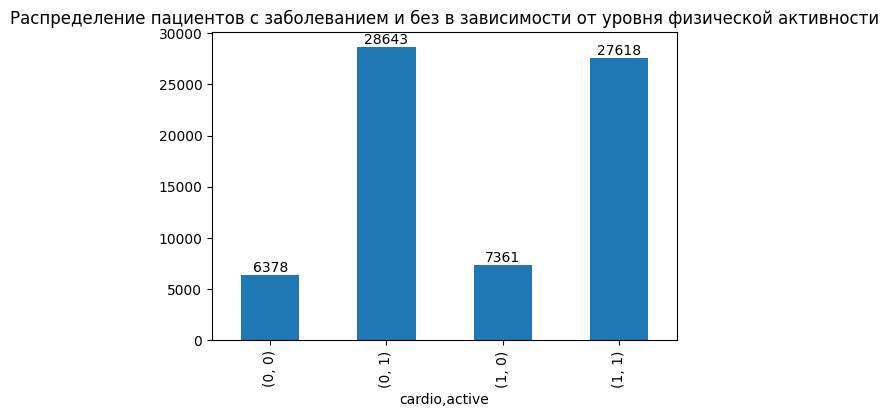

In [45]:
# визуализируем
plt.figure(figsize=[6,4])
ax=df.groupby(['cardio','active'])['active'].count().plot(kind="bar")
ax.bar_label(ax.containers[0])
plt.title("Распределение пациентов с заболеванием и без в зависимости от уровня физической активности")
plt.show()

Т.к. сам по себе рост и вес отдельно менее информативны при влиянии на СС заболевания, рассчитываем индекс массы тела.


In [46]:
# Распределение по индексу массы тела (ИМТ)
print('С заболеваниями ССС c ИМТ >25')
# В группе с заболеваниями ССС оставляем два столбца " рост" и "вес" и считаем количество с заболеванием ССС
BMI_1= cardio_1.groupby(['height','weight'])['cardio'].count().sort_values(ascending=False).reset_index()

BMI_1['height_m']= BMI_1['height']/100 #Перевод роста из см в метры
BMI_1['BMI']= BMI_1['weight']/BMI_1['height_m']**2 #Расчет ИМТ

# Оставляем два столбца и округляем значения
BMI_round= BMI_1[['cardio','BMI']].round()

# ИМТ в норме должен быть от 18,5 до 25, отсортируем по значению меньше и выше нормы.
print(BMI_round[(BMI_round['BMI']>25)]['cardio'].sum())
#print(BMI_round[(BMI_round['BMI']>25)]['BMI'])
print('С заболеваниями ССС c ИМТ <18')
print(BMI_round[(BMI_round['BMI']<18)]['cardio'].sum())
#print(BMI_round[(BMI_round['BMI']<18)]['BMI'])

print('------------------')
print('Без заболеваний ССС с ИМТ>25')
#В группе без заболеваний ССС оставляем два столбца " рост" и "вес" и считаем количество
BMI_0= cardio_0.groupby(['height','weight'])['cardio'].count().sort_values(ascending=False).reset_index()
BMI_0['height_m']= BMI_0['height']/100 #Перевод роста из см в метры
BMI_0['BMI']= BMI_0['weight']/BMI_0['height_m']**2 #Расчет ИМТ

# Оставляем два столбца и округляем значения
BMI_round_0= BMI_0[['cardio','BMI']].round()
# ИМТ в норме должен быть от 18,5 до 25, отсортируем по значению меньше и выше нормы.
print(BMI_round_0[(BMI_round_0['BMI']>25)]['cardio'].sum())
#print(BMI_round_0[(BMI_round_0['BMI']>25)]['BMI'])
print('С заболеваниями ССС c ИМТ <18')
print(BMI_round_0[(BMI_round_0['BMI']<18)]['cardio'].sum())
#print(BMI_round_0[(BMI_round_0['BMI']<18)]['BMI'])


С заболеваниями ССС c ИМТ >25
24093
С заболеваниями ССС c ИМТ <18
3
------------------
Без заболеваний ССС с ИМТ>25
19679
С заболеваниями ССС c ИМТ <18
3


Повышенный ИМТ влияет на заболеваемость. Пациентов с повышенным ИМТ больше в группе с наличием заболевания на 22,4% (24093/19679*100-100)

Построим матрицу корреляции Спирмена. Посмотрим есть ли взаимосвязь между всеми показателями относительно друг друга и в т.ч. заболеваемости

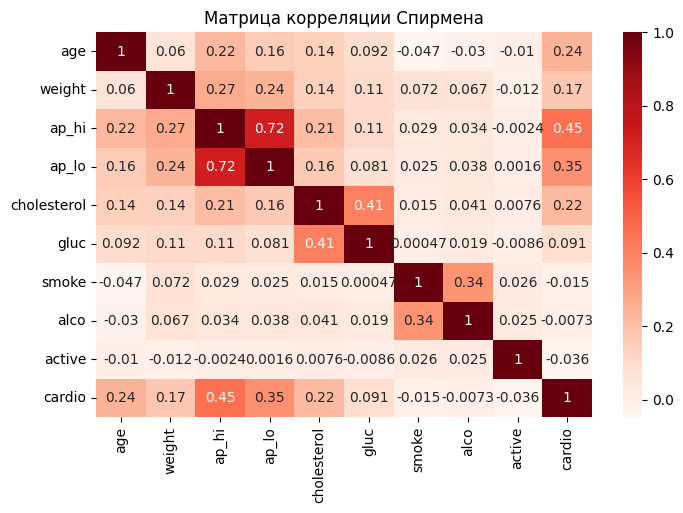

In [47]:
corr_matrix_spearman = df[["age", "weight", "ap_hi","ap_lo","cholesterol","gluc","smoke","alco","active","cardio"]].corr('spearman')
plt.figure(figsize=[8,5])
sns.heatmap(corr_matrix_spearman, annot=True, cmap='Reds')
plt.title("Матрица корреляции Спирмена")
plt.show()

1. Видно достаточно существенную взаимосвязь между систолическим и диастолическим АД , что вполне логично, т.к. эти два показателя непосредственно связаны.
2. Существует связь между целевой переменной (заболевания ССС)  и АД (как систолическим так и диастолическим), что тоже вполне логично, т.к. эти показатели также непосредственно связаны.
3. Небольшая связь между холестерином и заболеваниями ССС
4. Также есть небольшая связь между возрастом и ССС заболеваниями.

Регрессионный анализ. Логистическая регрессия
Модель будет на основе логистической регрессии,т.к. линейной взаимосвязи между целевым показателем и остальными переменными нет.

In [48]:
# Посмотрим насколько группы по наличию и отсутствию СС заболеваний  в среднем равны между собой
df.groupby('cardio').agg('mean').round(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
cardio,,,,,,,,,,,,
0,49862.87,51.23,1.35,164.89,73.24,119.79,78.24,1.22,1.18,0.09,0.06,0.82
1,50082.10,54.45,1.35,164.77,77.67,134.34,84.56,1.52,1.28,0.08,0.05,0.79


В группах практически одинаковое соотношение показателей, можно строить модель логистической регрессии.

In [49]:
# Удаляем  неинформативный столбец ID
df_log= df.drop('id',axis = 1)
df_log

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,65.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [64]:
# Разделим данные на признаки (X) и целевую переменную(Y)

X = df_log.drop('cardio', axis = 1)
y = df_log['cardio']


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, stratify=y)

In [66]:

scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)

X_test_st = scaler.transform(X_test)

X_train_st[:2]

array([[ 0.17029112, -0.73238877,  0.02189908, -0.42468775,  0.1734056 ,
        -0.14864193, -0.54135651, -0.39671285, -0.31139005, -0.23758011,
         0.49273461],
       [-0.86323034, -0.73238877, -0.79025211, -1.19735974, -1.59500819,
        -2.2578394 , -0.54135651, -0.39671285, -0.31139005, -0.23758011,
         0.49273461]])

In [67]:
# Используем алгоритм логистической регресии.
lr_model = LogisticRegression(random_state = 0)

#Обучим модель логистической регресии
lr_model.fit(X_train_st, y_train)



LogisticRegression(random_state=0)

In [69]:
# Воспользуемся уже обученной моделью, чтобы сделать прогнозы

lr_predictions_  = lr_model.predict(X_train_st)
lr_predictions  = lr_model.predict(X_test_st)

#Выводим основные метрики по тренировочным данным и тестовым
print(classification_report(y_train, lr_predictions_))
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74     28017
           1       0.76      0.67      0.71     27983

    accuracy                           0.73     56000
   macro avg       0.73      0.73      0.73     56000
weighted avg       0.73      0.73      0.73     56000

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      7004
           1       0.76      0.67      0.71      6996

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



Метрика accuracy составляет 0,73.
Прогноз по заболеваемости на основании факторов риска достаточный,чтобы с уверенностью сказать, что при наличии факторов риска пациенты будут иметь СС заболевание

Построим матрицу ошибок.

Text(50.722222222222214, 0.5, ' Факт')

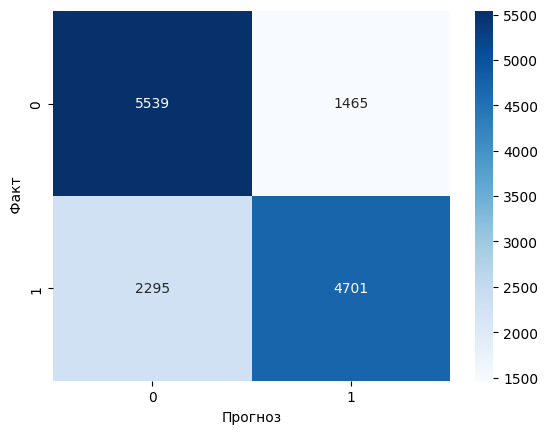

In [55]:

cm = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cm,annot = True, fmt='', cmap = 'Blues')
plt.xlabel ('Прогноз')
plt.ylabel(' Факт')

1. 4701 классифицированы как больные при наличие факторов риска  и они такими являются
2. 5539 классифицированы как здоровые при наличии факторов риска и они такими являются
3. 1465 классифицированы как больные, но на самом деле таковыми не являются
4. 2295 классифицированы как здоровые, но на самом деле таковыми не являются.

Выводы и рекомедации:

В анализируемом датасете представлены основные факторы риска развития ССЗ, такие как: повышенный уровень глюкозы и холестерина, курение, употребление алкоголя, повышенный уровень АД и гиподинамия (отсутствие или низкая физическая активность).
Набор данных состоял из 70000 записей с субъективными и объективными факторами риска и целевой переменной (заболевания ССС).
В ходе анализа было выявлено, что провоцирующими факторами заболевания являются:
1. Возраст
2. Повышенный уровень холестерина
3. Повышенный уровень глюкозы
4. Гиподинамия
5. Повышенный ИМТ (ожирение)
6. Сочетание нескольких факторов риска с курением и алкоголем

Рекомендации стейкхолдерам:

1. Медицинским работникам, проводящим санитарно просветительскую работу:
Рассказывать пациентам с наличием факторов риска о негативных последствиях вредных привычек
Убеждать пациентов регулярно обследоваться для раннего выявления заболевания или его предотвращения.
2. Пациентам:
Ежегодные обследования , контроль анализа крови
Отказ от вредных привычек, особенно пациентам имеющим в анамнезе другие факторы риска такие как повышенный холестерин и повышенный уровень глюкозы
Активный образ жизни, предотвращение гиподинамии
При наличии факторов риска, таких как повышенный уровень глюкозы и холестерина: контроль и соблюдение рекомендаций врача(диета, терапия).
